# WSI - zadanie 1

Artur Kempiński

Użyta technologia:
python==3.11.6
numpy==1.24.3
matplotlib==3.8.0

In [34]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import random

Definicje funkcji f(x) i g(x1, x2)

In [35]:
def f(x):
    return np.sin(x * np.pi) + x ** 2


def g(x):
    x1 = x[0]
    x2 = x[1]
    return (5 * np.e**2) - (4 * np.e*x1) + x1**2 + (2 * np.e * x2) + x2**2

Oraz ich gradientów

In [36]:
def f_grad(x):
    return np.pi * np.cos(x * np.pi) + 2 * x


def g_grad(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([2*(x1 - 2*np.e), 2*(x2 + np.e)])

# Wykresy f(x) oraz g(x1, x2)


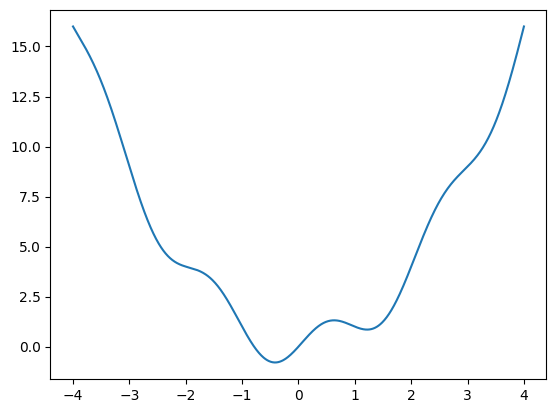

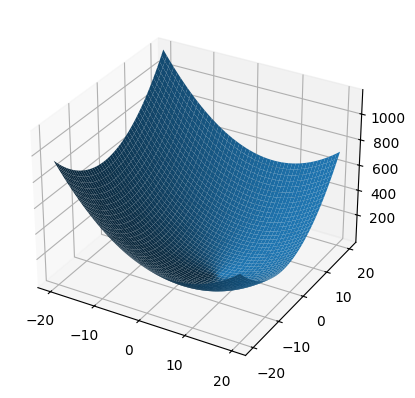

In [37]:
def draw_plot_2d(function, x_domain):
    y_domain = [function(x) for x in x_domain]
    
    plt.plot(x_domain, y_domain)
    plt.show()
    
    
def draw_plot_3d(function, x1_domain, x2_domain):
    x1_values, x2_values = np.meshgrid(x1_domain, x2_domain)
    x_values = np.array([x1_values, x2_values])
    y_domain = function(x_values)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x1_values, x2_values, y_domain)
    plt.show()
    
f_x_domain = np.linspace(-4, 4, 1000)
g_x_domain = np.linspace(-20, 20, 1000)

draw_plot_2d(f, f_x_domain)
draw_plot_3d(g, g_x_domain, g_x_domain)

Dziedzina funkcji została dobrana tak, aby widać było minimum/minima danej funkcji

Jak można zauważyć, funkcja f(x) posiada kilka minimów lokalnych, natomiast g(x1, x2) ma jedno minimum globalne. (jupyter nie pozwala na interakcję z wykresem, rysowanie go z poziomu skryptu pythonowego pozwala na obracanie wykresem 3D, dzięki czemu łatwiej jest zauważyć minimum globalne)

Odpowiadając na pytanie z podpunktu nr.1 uważam, że g(x1, x2) będzie łatwiejsza do optymalizacji, ponieważ szukając jej minima lokalnego, za każdym razem gdy je znajdziemy będzie to minimum globalne. 

W przypadku f(x) nie mamy pewności, że odnalezione przez algorytm minimum będzie jednocześnie najniższym punktem na wykresie funkcji, co byłoby najlepszym rezultatem optymalizacji

# Implementacja algorytmu najszybszego spadku


In [38]:
def gradient_descent(gradient, x0, step, epsilon=1e-06, max_iterations=500) -> tuple[float, list[float]]:
    x = x0
    x_tries = [x0]
    for _ in range(max_iterations):
        next_x_shift = -gradient(x) * step
        x += next_x_shift
        x_tries.append(x)
        if np.all(np.abs(next_x_shift) <= epsilon):
            break
    return x, x_tries

* Z moich przemyśleń podczas implementacji wynika, że podawanie funkcji której minimum liczymy jako argumentu funkcji gradient_descent jest zbędne

* Jako domyślną wartość epsilon (maksymalnej różnicy między wartościami składowych wektora x w kolejnych iteracjach oznaczającej znalezienie minimum) przyjąłem 10^-6. Jest to liczba znaleziona przeze mnie w jednej z przykładowych implementacji algorytmu najszybszego spadku na które natrafiłem przygotowując się do zadania.


In [39]:
def draw_points_on_2d_plot(function, x_values, x_domain, label=None):
    y_domain = [function(x) for x in x_domain]
    
    plt.plot(x_domain, y_domain)
    
    y_values = [function(x) for x in x_values]
    
    for i in range(len(y_values)):
        plt.scatter(x_values[i], y_values[i], color='red', marker='o')
    
    if label:
        plt.title(label)
        
    plt.show()
    

def draw_points_on_3d_plot(function, x1_domain, x2_domain, x_values, label=None):
    x1_domain, x2_domain = np.meshgrid(x1_domain, x2_domain)
    x_domain = np.array([x1_domain, x2_domain])
    y_domain = function(x_domain)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x1_domain, x2_domain, y_domain)
    
    x1_values = [x[0] for x in x_values]
    x2_values = [x[1] for x in x_values]
    y_values = [function(x) for x in x_values]
    
    for i in range(len(y_values)):
        ax.scatter(x1_values[i], x2_values[i], y_values[i], color='red', marker='o')
        
    if label:
        plt.title(label)
    
    plt.show()

Found minimums:
starting point = 41.289933233496754 ------> x = 1.2176579892393835
starting point = 28.73189742567817 ------> x = 1.2176579595222534
starting point = -53.398393859318325 ------> x = -0.41491202005906136
starting point = 81.31818859712504 ------> x = 1.2176579461223966
starting point = -86.57412460256668 ------> x = -0.41491199992396277
starting point = -61.402709358224136 ------> x = -0.4149119357573686
starting point = -1.9030238887919353 ------> x = -0.414911909855186
starting point = -50.48364588277157 ------> x = -0.4149119609043885
starting point = 74.6718339237623 ------> x = 1.2176579602687951
starting point = -26.42197109546916 ------> x = -0.41491194991839914


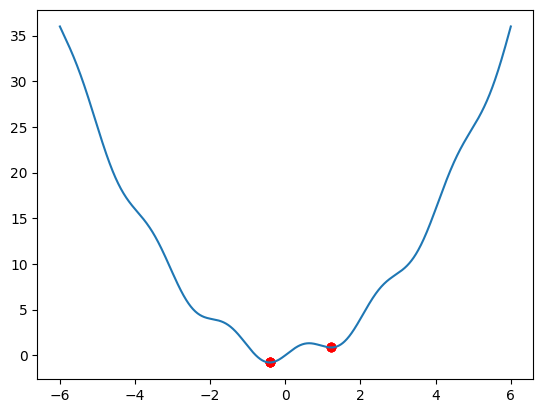

In [40]:
number_of_tries = 10

found_minimums = []
starting_points = [random.uniform(-100, 100) for _ in range(number_of_tries)]

for i in range(number_of_tries):
    x0 = starting_points[i]
    f_x_min, f_x_tries = gradient_descent(f_grad, x0, 0.05)
    found_minimums.append(f_x_min)

print('Found minimums:')
for i, x in enumerate(found_minimums):
    x0 = starting_points[i]
    print(f'starting point = {x0} ------> x = {x}')

draw_points_on_2d_plot(f, found_minimums, np.linspace(-6, 6, 1000))


* Jako wartość step przyjąłem 0.05, póki co nie wiem czy jest to najlepsza wartość którą można ustalić. Jednakże w każdej iteracji znalezione jest jedno z dwóch minimów lokalnych danej funkcji

* To, czy zostało znalezione minimum globalne zależy w dużej mierze od wyboru punktu początkowego

Found minimums:
starting point = [-60.92107729 -35.75190677] ------> x = [ 5.43655548 -2.7182859 ]
starting point = [97.80783387 21.007229  ] ------> x = [ 5.43657195 -2.7182797 ]
starting point = [ 22.90346156 -96.89951645] ------> x = [ 5.43656523 -2.71829029]
starting point = [-81.10612044  79.65466842] ------> x = [ 5.43655502 -2.71827361]
starting point = [-15.89560844  24.44171558] ------> x = [ 5.43655687 -2.71827319]
starting point = [  1.06788251 -52.46447431] ------> x = [ 5.43656292 -2.71829024]
starting point = [-52.08596374  62.16626524] ------> x = [ 5.43655578 -2.71827295]
starting point = [ 79.34213048 -24.62441788] ------> x = [ 5.43657185 -2.71828426]
starting point = [36.47690845 90.63710672] ------> x = [ 5.43656644 -2.71827344]
starting point = [-42.50902033  96.92240326] ------> x = [ 5.43655935 -2.71827288]


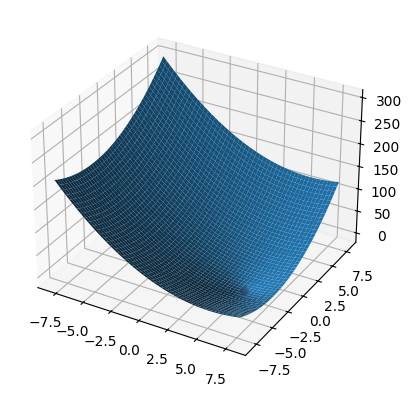

In [41]:
number_of_tries = 10

found_minimums = []
starting_points = [np.array([random.uniform(-100, 100), random.uniform(-100, 100)]) for _ in range(number_of_tries)]

for i in range(number_of_tries):
    x0 = starting_points[i].copy()  # copy() is needed because x0 is a numpy array and it is mutable
    g_x_min, g_x_tries = gradient_descent(g_grad, x0, 0.05)
    found_minimums.append(g_x_min)
    
print('Found minimums:')
for i, x in enumerate(found_minimums):
    x0 = starting_points[i]
    print(f'starting point = {x0} ------> x = {x}')
    
    
draw_points_on_3d_plot(g, np.linspace(-8, 8, 1000), np.linspace(-8, 8, 1000), found_minimums)

* W przypadku tej funkcji zawsze znajdowane jest minimum globalne, ponieważ jest to jej jedyne minimum 

* Na tym wykresie 3D ciężko dostrzec zaznaczony punkt, jednak zgadza się on z prawdziwym minimum. Testy poprawności algorytmu znajdują się poniżej

In [42]:
real_f_mins = [-0.414912, 1.21766]
real_g_mins = [[2*np.e, -np.e]]

found_f_min = gradient_descent(f_grad, random.uniform(-100, 100), 0.05)[0]
found_g_min = gradient_descent(g_grad, np.array([random.uniform(-100, 100), random.uniform(-100, 100)]), 0.1)[0]

print(f'f(x) minimum: real = {real_f_mins}, found = {found_f_min}')
print(f'g(x) minimum: real = {real_g_mins}, found = {found_g_min}')

f(x) minimum: real = [-0.414912, 1.21766], found = 1.2176579547626103
g(x) minimum: real = [[5.43656365691809, -2.718281828459045]], found = [ 5.43655993 -2.71828203]


*prawdziwe (przyblizone) wartości minimum z WolframAlpha

# Testy wpływu rozmiaru kroku na szybkość i jakość działania algorytmu

In [43]:
def analyze_steps(steps, function_grad, x0, real_mins, max_iterations=5000):
    print(f'funtion minimums: {real_mins}')
    print(f'starting point = {x0}')
    for step in steps:
        x, x_tries = gradient_descent(function_grad, x0, step, max_iterations=max_iterations)
        print(f'step = {step}, found min = {x}, number of iterations = {len(x_tries)} ')

In [44]:
real_f_mins = [-0.414912, 1.21766]

steps = [5, 1.5, 0.5, 0.1, 0.01, 0.001, 0.0001, 0.00001]
x0 = random.uniform(-25, 25)

analyze_steps(steps, f_grad, x0, real_f_mins)

funtion minimums: [-0.414912, 1.21766]
starting point = -14.252112321772092
step = 5, found min = nan, number of iterations = 5001 
step = 1.5, found min = nan, number of iterations = 5001 
step = 0.5, found min = 0.9933586892910006, number of iterations = 5001 
step = 0.1, found min = -0.4149116479319134, number of iterations = 25 
step = 0.01, found min = -0.4149189906442406, number of iterations = 259 
step = 0.001, found min = -0.4149973811634744, number of iterations = 2428 
step = 0.0001, found min = -5.4371403631932145, number of iterations = 5001 
step = 1e-05, found min = -12.915657529787502, number of iterations = 5001 


/var/folders/qq/8_n76q_n2sjd8ydtrz0gg2g00000gn/T/ipykernel_61095/384332716.py:5: RuntimeWarning: overflow encountered in scalar multiply
  next_x_shift = -gradient(x) * step
/var/folders/qq/8_n76q_n2sjd8ydtrz0gg2g00000gn/T/ipykernel_61095/727784292.py:2: RuntimeWarning: invalid value encountered in cos
  return np.pi * np.cos(x * np.pi) + 2 * x
/var/folders/qq/8_n76q_n2sjd8ydtrz0gg2g00000gn/T/ipykernel_61095/727784292.py:2: RuntimeWarning: overflow encountered in scalar multiply
  return np.pi * np.cos(x * np.pi) + 2 * x


Badając przekrojowo rózne rzędy wielości kroku dochodzę do wniosku, wartość 0.1 wydaje się najlepsza. 


Ponizej głębsza analiza dla mniejszego zakresu wartości skoku

In [54]:
real_f_mins = [-0.414912, 1.21766]

steps = [1.2, 1, 0.8, 0.5, 0.3, 0.2, 0.1, 0.075, 0.05, 0.01, 0.005, 0.001]
x0 = random.uniform(-25, 25)

analyze_steps(steps, f_grad, x0, real_f_mins)

funtion minimums: [-0.414912, 1.21766]
starting point = 17.933349731654005
step = 1.2, found min = nan, number of iterations = 5001 
step = 1, found min = 15018.056619451167, number of iterations = 5001 
step = 0.8, found min = 2.7641863344856596, number of iterations = 5001 
step = 0.5, found min = 0.3534903624660868, number of iterations = 5001 
step = 0.3, found min = -0.3791033726012343, number of iterations = 5001 
step = 0.2, found min = 1.217656637854452, number of iterations = 32 
step = 0.1, found min = 1.217657044170057, number of iterations = 19 
step = 0.075, found min = 1.2176574155152196, number of iterations = 29 
step = 0.05, found min = 1.2176580296860744, number of iterations = 47 
step = 0.01, found min = 1.2176672168704394, number of iterations = 241 
step = 0.005, found min = 1.2176795720559146, number of iterations = 469 
step = 0.001, found min = 1.2177772159976217, number of iterations = 2164 


/var/folders/qq/8_n76q_n2sjd8ydtrz0gg2g00000gn/T/ipykernel_61095/727784292.py:2: RuntimeWarning: overflow encountered in scalar multiply
  return np.pi * np.cos(x * np.pi) + 2 * x
/var/folders/qq/8_n76q_n2sjd8ydtrz0gg2g00000gn/T/ipykernel_61095/727784292.py:2: RuntimeWarning: invalid value encountered in cos
  return np.pi * np.cos(x * np.pi) + 2 * x


Podobna analiza dla g(x1, x2):

In [46]:
real_g_mins = [[5.43656365691809, -2.718281828459045]]

steps = [1.2, 1, 0.8, 0.5, 0.3, 0.2, 0.1, 0.075, 0.05, 0.01, 0.005, 0.001]
x0 = [random.uniform(-100, 100), random.uniform(-100, 100)]

analyze_steps(steps, g_grad, x0, real_g_mins)

funtion minimums: [[5.43656365691809, -2.718281828459045]]
starting point = [-39.91346718008466, 88.41523243658747]
step = 1.2, found min = [nan nan], number of iterations = 5001 
step = 1, found min = [-39.91346718  88.41523244], number of iterations = 5001 
step = 0.8, found min = [ 5.43656349 -2.71828149], number of iterations = 39 
step = 0.5, found min = [ 5.43656366 -2.71828183], number of iterations = 3 
step = 0.3, found min = [ 5.43656346 -2.71828143], number of iterations = 22 
step = 0.2, found min = [ 5.43656319 -2.71828089], number of iterations = 37 
step = 0.1, found min = [ 5.4365617 -2.7182779], number of iterations = 77 
step = 0.075, found min = [ 5.43656122 -2.71827693], number of iterations = 104 
step = 0.05, found min = [ 5.43655958 -2.71827364], number of iterations = 155 
step = 0.01, found min = [ 5.43653949 -2.71823326], number of iterations = 716 
step = 0.005, found min = [ 5.43651469 -2.71818343], number of iterations = 1368 
step = 0.001, found min = [ 5.

/var/folders/qq/8_n76q_n2sjd8ydtrz0gg2g00000gn/T/ipykernel_61095/384332716.py:5: RuntimeWarning: overflow encountered in multiply
  next_x_shift = -gradient(x) * step
/var/folders/qq/8_n76q_n2sjd8ydtrz0gg2g00000gn/T/ipykernel_61095/384332716.py:6: RuntimeWarning: invalid value encountered in add
  x += next_x_shift


* Co ciekawe, optymalny rozmiar kroku róźni się dla obu funkcji. Dla f(x) jest to 0.1, dla g(x1, x2) - 0.5

* Dla g(x1, x2) wybór punktu startowego wydaje się mieć mniejszy wpływ na ilość iteracji potrzebnych do znalezienia minimum. Wydaje mi sie, ze jest to spowodowane faktem, ze g(x1, x2) posiada tylko jedno minimum, jednakze nie jestem tego pewny.

* Zaobserwowałem takze, ze wartosc kroku 0.2 dla f(x) czasem powoduje znalezienie minimum w kilkanaście/kilkadziesiąt iteracji, a czasem osiągnięcie limitu iteracji. Prawdopodobnie zalezy to od wyboru punktu początkowego, jednak tego takze nie jestem pewny

In [47]:
def draw_g_plot_steps_iterations(steps, max_iterations):
    starting_points = [np.array([random.uniform(-100, 100), random.uniform(-100, 100)]) for _ in range(10)]

    step_with_average_iterations = []

    for step in steps:
        amounts_of_iterations = []
        for starting_point in starting_points:
            x0 = starting_point.copy()
            x, x_tries = gradient_descent(g_grad, x0, step, max_iterations=max_iterations)
            amounts_of_iterations.append(len(x_tries))
        average_iterations_count = sum(amounts_of_iterations) / len(amounts_of_iterations)
        step_with_average_iterations.append((step, average_iterations_count))
        
    steps, average_iterations = list(zip(*step_with_average_iterations))

    plt.plot(steps, average_iterations)
    plt.xlabel('step')
    plt.ylabel('average iterations count')
    plt.show()

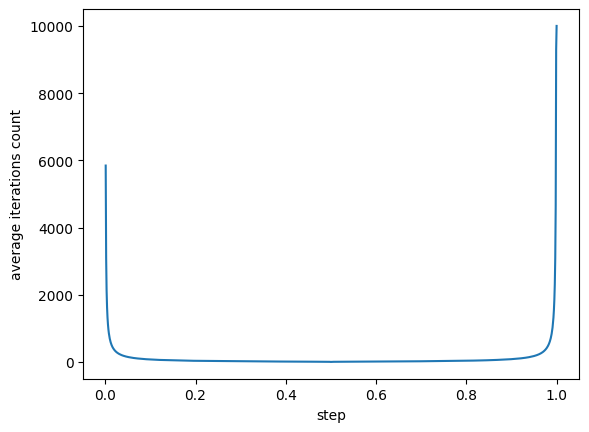

In [48]:
steps = np.linspace(1, 0.001, 1000)

draw_g_plot_steps_iterations(steps, 10000)

Jak widać, krok bliski 0 lub 1 dla g(x1, x2) znacząco zwieksza ilość iteracji potrzebnych do znalezienia minimum, bądź tez je uniemozliwia

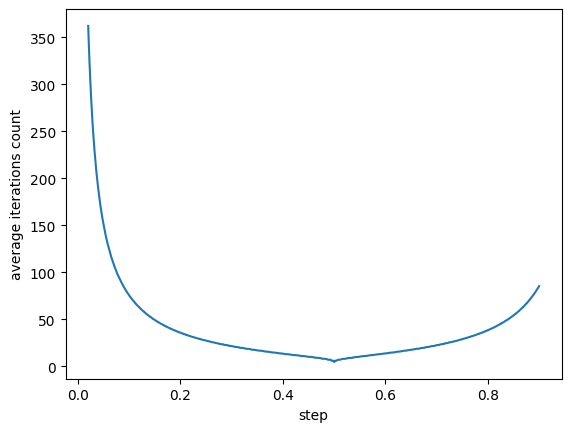

In [49]:
steps = np.linspace(0.9, 0.02, 1000)

draw_g_plot_steps_iterations(steps, 10000)

Przy mniejszym zakresie długości kroków mozna lepiej zauwazyc, ze wartosc kroku w okolicach 0.5 jest idealna do minimalizacji g(x1, x2)

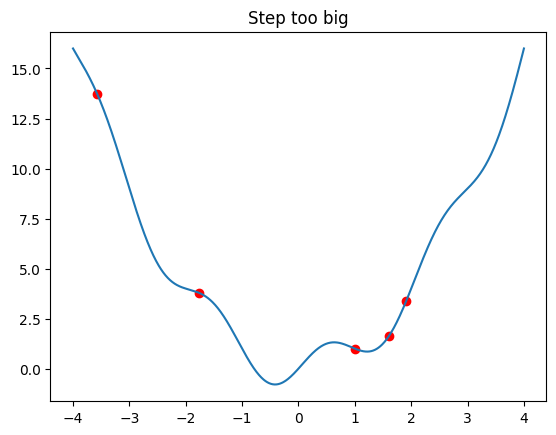

In [50]:
x0 = 1
x_domain = np.linspace(-4, 4, 1000)

x, x_tries = gradient_descent(f_grad, x0, 0.8, max_iterations=4)

draw_points_on_2d_plot(f, x_tries, x_domain, label='Step too big')

Zbyt duzy krok moze powodować "przeskakiwanie" minimów, co starałem się ukazać wykresem powyzej

Mimo startu z punktu x=1 dosyć bliskiego minimum, algorytm zaczyna oddalać się od poprawnego wyniku

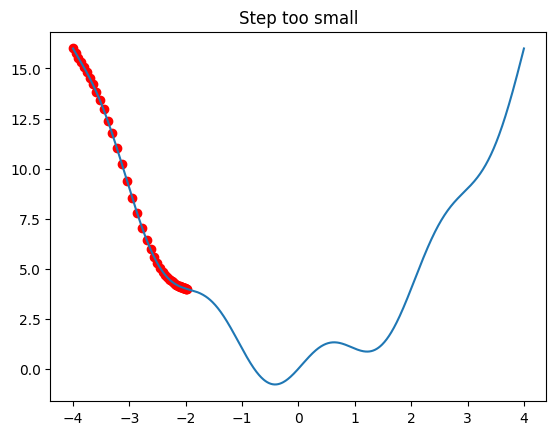

In [51]:
x0 = -4
x_domain = np.linspace(-4, 4, 1000)

x, x_tries = gradient_descent(f_grad, x0, 0.01, max_iterations=50)

draw_points_on_2d_plot(f, x_tries, x_domain, label='Step too small')

Zbyt mały krok przy zbyt małej maksymalnej liczbie iteracji moze powodować, ze "braknie" iteracji potrzebnych do znalezienia minimum